In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import calendar
from statsmodels.tsa.stattools import adfuller

In [3]:
data=pd.read_csv('SPASX200.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close
0,05/13/22,6946.9,7075.1,6946.9,7075.1
1,05/12/22,7062.9,7063.4,6930.2,6941.0
2,05/11/22,7047.6,7064.7,6991.8,7064.7
3,05/10/22,7080.9,7080.9,6939.5,7051.2
4,05/09/22,7181.5,7184.5,7092.3,7120.7


In [5]:
Price_ASX=data[" Close"]
result=adfuller(Price_ASX)
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -2.164240
p-value: 0.219479


# Since this Series is not stationary, we try differencing till the series becomes stationary

In [6]:
Price_ASX_diff= Price_ASX - Price_ASX.shift(periods=1)
Price_ASX_diff.dropna(inplace=True)
result=adfuller(Price_ASX_diff)
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
pval=result[1]
if pval<0.05:
    print('Data is staionary after period=1')
else:
    print('Data is not stationary, hence try with periods=2')
    Price_ASX_diff_1= Price_ASX - Price_ASX.shift(periods=2)
    Price_ASX_diff_1.dropna(inplace=True)
    result=adfuller(Price_ASX_diff_1)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    pval=result[1]
    if pval<0.05:
        print('Data is staionary')
    else:
        print('Data is not stationary,try log differencing')
    

ADF Statistics: -9.221351
p-value: 0.000000
Data is staionary after period=1


# Series has become stationary after 1 differencing

# Now we know the value of d=1. We need to find the values for parameters p and q using ACF and PACF plots

In [7]:
#ACF and PACF plots:
from  statsmodels.tsa.stattools import acf,pacf
import matplotlib.pyplot as plt
lag_acf = acf(Price_ASX_diff,nlags=20)
lag_pacf=pacf(Price_ASX_diff,nlags=20,method='ols')

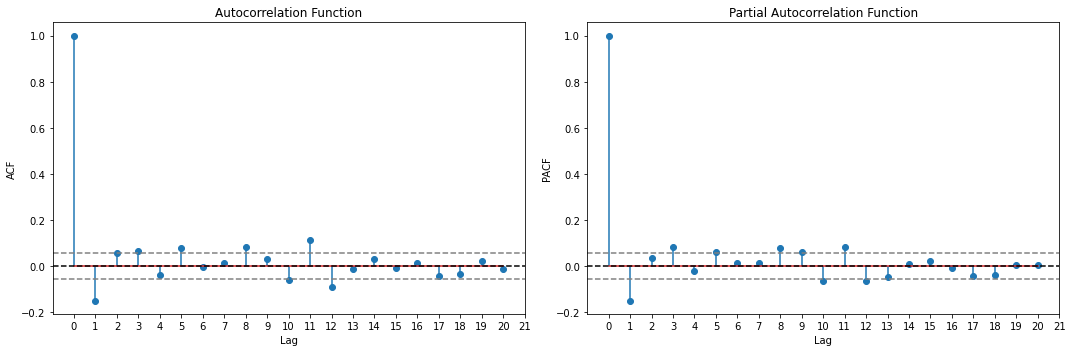

In [8]:
#Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(Price_ASX_diff)),linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(Price_ASX_diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(Price_ASX_diff)),linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(Price_ASX_diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# From the above ACF and PACF plot, the values of p=1 and q=1 is obtained

In [9]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
x= Price_ASX.values
size= int(len(x)*0.7)
train, test = x[0:size],x[size:len(x)]
y_hat_ARIMA=test.copy()
order=(1,1,1)

In [10]:
predictions = list()
history = [x for x in train]
for t in range(len(test)):
    model = ARIMA(history,order=order)
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs =test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' %(yhat, obs))

predicted=5925.816681, expected=5928.200000
predicted=5924.895200, expected=5896.900000
predicted=5900.978883, expected=5875.200000
predicted=5876.594030, expected=5818.100000
predicted=5825.789095, expected=5849.200000
predicted=5841.066465, expected=5840.800000
predicted=5841.571715, expected=5830.300000
predicted=5830.183279, expected=5805.100000
predicted=5807.571191, expected=5728.200000
predicted=5738.967324, expected=5665.200000
predicted=5672.282195, expected=5664.100000
predicted=5661.253917, expected=5829.000000
predicted=5799.839118, expected=5843.100000
predicted=5843.004637, expected=5904.900000
predicted=5892.915290, expected=5939.500000
predicted=5933.849586, expected=5942.400000
predicted=5941.114073, expected=5939.100000
predicted=5938.210796, expected=5869.900000
predicted=5879.792198, expected=5837.100000
predicted=5839.328513, expected=5895.700000
predicted=5883.988574, expected=5883.800000
predicted=5885.751815, expected=6049.800000
predicted=6020.469112, expected=

predicted=5850.846316, expected=5855.900000
predicted=5850.689747, expected=5820.700000
predicted=5825.535974, expected=5838.000000
predicted=5833.062871, expected=5890.700000
predicted=5881.698400, expected=5876.800000
predicted=5878.898307, expected=5833.300000
predicted=5838.374979, expected=6026.200000
predicted=5993.475209, expected=6121.400000
predicted=6110.185984, expected=6090.100000
predicted=6095.399138, expected=6037.700000
predicted=6043.816445, expected=6022.800000
predicted=6022.988177, expected=6075.400000
predicted=6066.087114, expected=6050.000000
predicted=6054.038595, expected=6054.700000
predicted=6052.207957, expected=6037.000000
predicted=6038.871669, expected=5991.900000
predicted=5997.325875, expected=6005.800000
predicted=6001.637437, expected=6014.600000
predicted=6012.591090, expected=6015.800000
predicted=6014.662958, expected=6048.600000
predicted=6042.504279, expected=6077.100000
predicted=6072.409836, expected=6070.100000
predicted=6070.673789, expected=

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6012.788606, expected=5953.800000
predicted=5962.022325, expected=5959.900000
predicted=5956.544497, expected=5931.700000
predicted=5935.222900, expected=5937.800000
predicted=5935.090243, expected=5909.000000
predicted=5912.499402, expected=5919.100000
predicted=5915.759592, expected=5903.200000
predicted=5904.812610, expected=5916.300000
predicted=5912.769550, expected=5905.600000
predicted=5906.449367, expected=5897.600000
predicted=5897.394255, expected=5894.000000
predicted=5893.269352, expected=5907.000000
predicted=5903.818149, expected=5896.100000
predicted=5896.923124, expected=5890.500000
predicted=5889.927098, expected=5889.600000
predicted=5888.508316, expected=5846.800000
predicted=5852.156441, expected=5814.200000
predicted=5817.016576, expected=5794.500000
predicted=5795.685279, expected=5772.100000
predicted=5773.907895, expected=5738.100000
predicted=5741.545825, expected=5739.300000
predicted=5737.139757, expected=5710.700000
predicted=5713.873626, expected=

In [26]:
from itertools import chain
pred_list = list(chain.from_iterable(predictions))

In [27]:
print(pred_list);print(len(pred_list))

[5925.816681052386, 5924.89520006322, 5900.978882961648, 5876.594029875946, 5825.7890954426475, 5841.066465351538, 5841.571715072916, 5830.183278984439, 5807.571191055056, 5738.967323635071, 5672.282194617061, 5661.253916916212, 5799.839117604042, 5843.004636746471, 5892.915289974686, 5933.849586129319, 5941.114072734771, 5938.210796109838, 5879.792198320696, 5839.328513147756, 5883.988573676825, 5885.751815300181, 6020.469111798764, 6045.3947553196085, 6088.4389291338575, 6172.0123224262115, 6178.576178257646, 6149.408026238938, 6127.629338565251, 6163.243726879027, 6201.954585081255, 6185.117271933308, 6188.657574058341, 6186.248615718839, 6185.44166541595, 6192.325267253928, 6172.692152311816, 6184.925223417628, 6165.665749306108, 6179.275604199881, 6168.13093686106, 6132.973938886308, 6166.2494638293365, 6179.266157559145, 6146.7234883360625, 6141.427589189085, 6156.757517323052, 6218.285352764009, 6283.598631436329, 6308.37951703859, 6317.445613817013, 6345.869235473248, 6352.0416

In [28]:
pred_ARIMA_df=pd.DataFrame({'obs': test,'Predicted': pred_list})
pred_ARIMA_df.head()

,obs,Predicted
0,5928.2,5925.816681
1,5896.9,5924.895200
2,5875.2,5900.978883
3,5818.1,5876.594030
4,5849.2,5825.789095


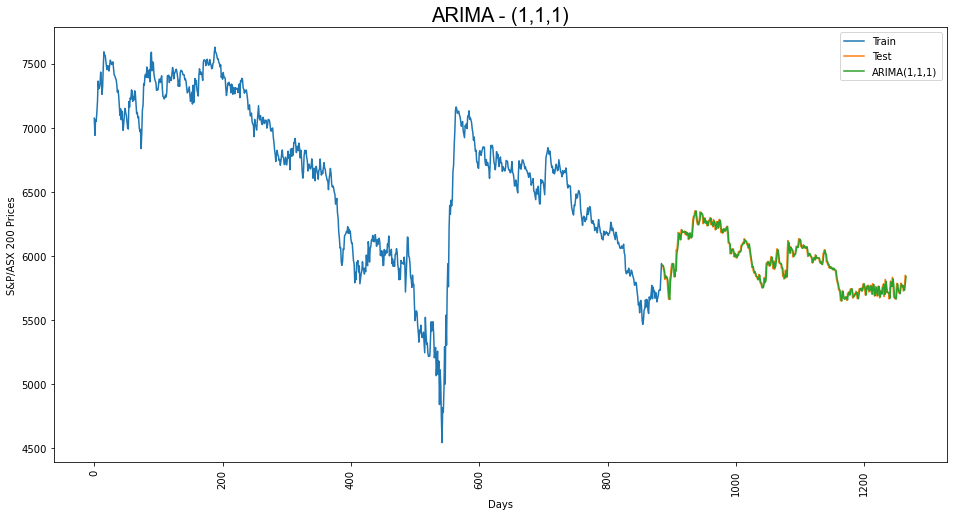

In [29]:
plt.figure(figsize=(16,8))

plt.plot(train,label='Train')
plt.plot([None for i in train]+[x for x in pred_ARIMA_df['obs'].values],label='Test')
plt.plot([None for i in train]+[x for x in pred_ARIMA_df['Predicted'].values],label='ARIMA(1,1,1)')

plt.title('ARIMA - (1,1,1)',family='Arial',fontsize=20)
plt.ylabel('S&P/ASX 200 Prices')
plt.xlabel('Days')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

# Since there is slight difference between the actual and forecasted values, we shall compute RMSE and MAPE.

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error as MAPE
rmse= np.sqrt(mean_squared_error(pred_ARIMA_df['obs'],pred_ARIMA_df['Predicted']))
mape= MAPE(pred_ARIMA_df['obs'],pred_ARIMA_df['Predicted'])
print(rmse,mape)

37.67139521681384 0.004670935781715974
